## Importing Libraries

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Loading Dataset

In [2]:
dataset_path = "C:/Users/MUNI SAI/Downloads/ravdess/audio_speech_actors_01-24"


In [3]:
# List all the audio files in the dataset
audio_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            audio_files.append(os.path.join(root, file))

# Display the first few audio files
print("Sample audio files:")
for audio_file in audio_files[:5]:
    print(audio_file)

Sample audio files:
C:/Users/MUNI SAI/Downloads/ravdess/audio_speech_actors_01-24\Actor_01\03-01-01-01-01-01-01.wav
C:/Users/MUNI SAI/Downloads/ravdess/audio_speech_actors_01-24\Actor_01\03-01-01-01-01-02-01.wav
C:/Users/MUNI SAI/Downloads/ravdess/audio_speech_actors_01-24\Actor_01\03-01-01-01-02-01-01.wav
C:/Users/MUNI SAI/Downloads/ravdess/audio_speech_actors_01-24\Actor_01\03-01-01-01-02-02-01.wav
C:/Users/MUNI SAI/Downloads/ravdess/audio_speech_actors_01-24\Actor_01\03-01-02-01-01-01-01.wav


In [4]:
len(audio_files)

1440

C:/Users/MUNI SAI/Downloads/ravdess/audio_speech_actors_01-24\Actor_12\03-01-08-02-02-02-12.wav


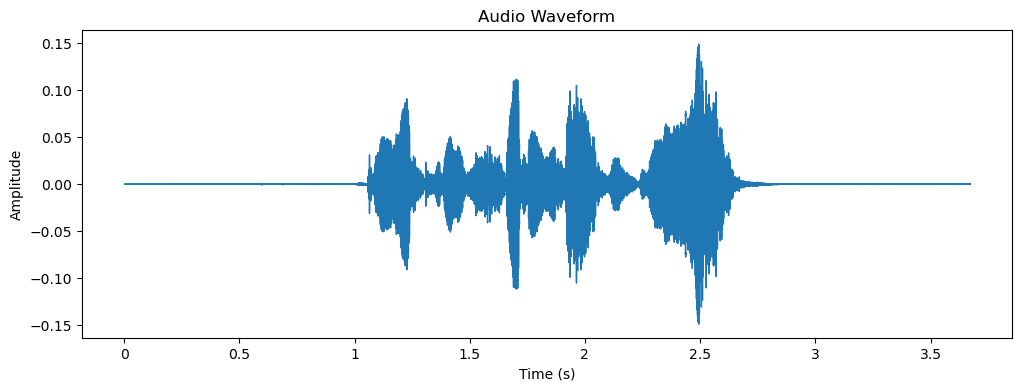

In [5]:
# Load and visualize a sample audio file
sample_audio = audio_files[719]
y, sr = librosa.load(sample_audio)
print(sample_audio)

# Plot the audio waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## Data Pre-processing and Feature Extraction

In [6]:
# Function to extract MFCC features from an audio file
def extract_mfcc(audio_file, num_mfcc=13):
    audio_data, sample_rate = librosa.load(audio_file, sr=None)
    mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=num_mfcc)
    return mfcc_features.T

In [7]:
# Directory containing your audio files

dataset_dir = dataset_path  # Replace with the path to your dataset directory

# Initialize a dictionary to store features
features_dict = {}

# Loop through each subdirectory (e.g., "Actor") within the main dataset directory
for actor_subdir in os.listdir(dataset_dir):
    actor_dir = os.path.join(dataset_dir, actor_subdir)
    
    # Check if the subdirectory is a directory (to avoid non-directory files)
    if os.path.isdir(actor_dir):
        # Loop through each audio file in the actor's directory and extract features
        for audio_file in os.listdir(actor_dir):
            if audio_file.endswith(".wav"):
                file_path = os.path.join(actor_dir, audio_file)
                mfcc_features = extract_mfcc(file_path)
                features_dict[audio_file] = mfcc_features

# Now, features_dict contains MFCC features with file names as keys
# You can access the features for a specific file using features_dict[file_name]

In [18]:
features_dict

{'03-01-01-01-01-01-01.wav': array([[-861.5326,    0.    ,    0.    , ...,    0.    ,    0.    ,
            0.    ],
        [-861.5326,    0.    ,    0.    , ...,    0.    ,    0.    ,
            0.    ],
        [-861.5326,    0.    ,    0.    , ...,    0.    ,    0.    ,
            0.    ],
        ...,
        [-861.5326,    0.    ,    0.    , ...,    0.    ,    0.    ,
            0.    ],
        [-861.5326,    0.    ,    0.    , ...,    0.    ,    0.    ,
            0.    ],
        [-861.5326,    0.    ,    0.    , ...,    0.    ,    0.    ,
            0.    ]], dtype=float32),
 '03-01-01-01-01-02-01.wav': array([[-861.444,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
        [-861.444,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
        [-861.444,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
        ...,
        [-861.444,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
        [-861.444,    0.   ,    0.   , ...,    0.   ,    0.  

In [9]:
# Directory containing your main dataset folder (e.g., "Ravdess dataset")
dataset_dir = dataset_path # Replace with the path to your dataset directory

# Initialize a dictionary to store class labels for each audio file
class_labels = {}

# Loop through each subdirectory (e.g., "Actor") within the main dataset directory
for actor_subdir in os.listdir(dataset_dir):
    actor_dir = os.path.join(dataset_dir, actor_subdir)
    
    # Check if the subdirectory is a directory (to avoid non-directory files)
    if os.path.isdir(actor_dir):
        # Get the class label (folder name) for this actor
        class_label = actor_subdir
        
        # Loop through each audio file in the actor's directory and assign the class label
        for audio_file in os.listdir(actor_dir):
            if audio_file.endswith(".wav"):
                file_name = audio_file
                class_labels[file_name] = class_label

# Now, class_labels is a dictionary where keys are audio file names, and values are class labels (folder names)
# You can access the class label for a specific file using class_labels[file_name]

In [10]:
print(class_labels)

{'03-01-01-01-01-01-01.wav': 'Actor_01', '03-01-01-01-01-02-01.wav': 'Actor_01', '03-01-01-01-02-01-01.wav': 'Actor_01', '03-01-01-01-02-02-01.wav': 'Actor_01', '03-01-02-01-01-01-01.wav': 'Actor_01', '03-01-02-01-01-02-01.wav': 'Actor_01', '03-01-02-01-02-01-01.wav': 'Actor_01', '03-01-02-01-02-02-01.wav': 'Actor_01', '03-01-02-02-01-01-01.wav': 'Actor_01', '03-01-02-02-01-02-01.wav': 'Actor_01', '03-01-02-02-02-01-01.wav': 'Actor_01', '03-01-02-02-02-02-01.wav': 'Actor_01', '03-01-03-01-01-01-01.wav': 'Actor_01', '03-01-03-01-01-02-01.wav': 'Actor_01', '03-01-03-01-02-01-01.wav': 'Actor_01', '03-01-03-01-02-02-01.wav': 'Actor_01', '03-01-03-02-01-01-01.wav': 'Actor_01', '03-01-03-02-01-02-01.wav': 'Actor_01', '03-01-03-02-02-01-01.wav': 'Actor_01', '03-01-03-02-02-02-01.wav': 'Actor_01', '03-01-04-01-01-01-01.wav': 'Actor_01', '03-01-04-01-01-02-01.wav': 'Actor_01', '03-01-04-01-02-01-01.wav': 'Actor_01', '03-01-04-01-02-02-01.wav': 'Actor_01', '03-01-04-02-01-01-01.wav': 'Actor_01',

## Train Test Split

In [11]:
# Create dictionaries to store audio files for training and testing for each class
train_data = {}
test_data = {}

# Set the ratio of data to allocate for training (e.g., 80% for training, 20% for testing)
train_ratio = 0.8
unique_class_labels = set(class_labels.values())
print(len(unique_class_labels))

24


In [12]:
print((unique_class_labels))

{'Actor_14', 'Actor_06', 'Actor_11', 'Actor_12', 'Actor_01', 'Actor_24', 'Actor_09', 'Actor_03', 'Actor_13', 'Actor_22', 'Actor_19', 'Actor_16', 'Actor_10', 'Actor_21', 'Actor_04', 'Actor_18', 'Actor_07', 'Actor_15', 'Actor_08', 'Actor_05', 'Actor_23', 'Actor_02', 'Actor_20', 'Actor_17'}


In [13]:
import random
for class_label in unique_class_labels:
    # Get a list of audio files for the current class
    class_files = [file_name for file_name, label in class_labels.items() if label == class_label]
    
    # Shuffle the list of audio files to randomize the split
    random.shuffle(class_files)
    
    # Determine the number of files for training and testing based on the ratio
    num_train_files = int(len(class_files) * train_ratio)
    
    # Assign files to training and testing dictionaries
    train_data[class_label] = class_files[:num_train_files]
    test_data[class_label] = class_files[num_train_files:]

In [17]:
train_set

['03-01-02-01-02-02-14.wav',
 '03-01-03-01-01-02-14.wav',
 '03-01-07-02-01-02-14.wav',
 '03-01-06-01-02-02-14.wav',
 '03-01-03-02-02-02-14.wav',
 '03-01-03-01-02-02-14.wav',
 '03-01-08-02-02-02-14.wav',
 '03-01-06-02-02-02-14.wav',
 '03-01-04-01-01-01-14.wav',
 '03-01-04-01-02-01-14.wav',
 '03-01-06-01-01-01-14.wav',
 '03-01-04-02-01-01-14.wav',
 '03-01-04-02-01-02-14.wav',
 '03-01-05-02-01-01-14.wav',
 '03-01-04-02-02-01-14.wav',
 '03-01-06-01-02-01-14.wav',
 '03-01-02-01-02-01-14.wav',
 '03-01-05-02-01-02-14.wav',
 '03-01-05-02-02-01-14.wav',
 '03-01-05-01-01-01-14.wav',
 '03-01-08-02-02-01-14.wav',
 '03-01-01-01-02-02-14.wav',
 '03-01-08-02-01-02-14.wav',
 '03-01-07-01-01-02-14.wav',
 '03-01-03-02-01-01-14.wav',
 '03-01-06-02-01-02-14.wav',
 '03-01-06-01-01-02-14.wav',
 '03-01-02-02-01-02-14.wav',
 '03-01-02-01-01-02-14.wav',
 '03-01-07-02-02-01-14.wav',
 '03-01-07-01-02-01-14.wav',
 '03-01-06-02-02-01-14.wav',
 '03-01-07-01-01-01-14.wav',
 '03-01-02-02-02-01-14.wav',
 '03-01-05-01-

In [15]:
train_set = [file for files in train_data.values() for file in files]
test_set = [file for files in test_data.values() for file in files]

In [19]:
print(len(train_set))

1152


In [20]:
print(len(test_set))

288


In [21]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert the dictionary to arrays
X = [features_dict[file] for file in features_dict]
y = [class_labels[file] for file in features_dict]

# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



In [23]:
scaler = StandardScaler()
scaled_features = [scaler.fit_transform(features) for features in X] 


In [30]:
# Find the maximum shape among all feature matrices
max_shape = max(f.shape for f in scaled_features)


padded_features = np.array([np.pad(f, ((0, max_shape[0] - f.shape[0]), (0, max_shape[1] - f.shape[1])), 'constant') for f in scaled_features])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(padded_features, y_encoded, test_size=0.2, random_state=42)


## Model Building

In [39]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the simplified model architecture
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    layers.LSTM(256, return_sequences=True),
    layers.LSTM(128),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

# Compile the simplified model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()





Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 495, 256)          276480    
                                                                 
 lstm_9 (LSTM)               (None, 128)               197120    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 24)                1560      
                                                                 
Total params: 483416 (1.84 MB)
Trainable params: 483416 (1.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
from tensorflow import keras
from tensorflow.keras import layers
# Define the CNN model architecture
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2], 1)),  # Input shape based on padded MFCC features
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')  # Number of output classes
])
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 493, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 246, 5, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 244, 3, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 122, 1, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 7808)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [43]:
from tensorflow.keras import layers

def build_model(hp):
    model1 = keras.Sequential([
        keras.layers.Conv2D(
            filters=hp.Int("conv1filter", min_value=30, max_value=200, step=10),
            kernel_size=hp.Choice("conv1kernel",values=[3,4,]),
            activation ='relu',
            input_shape=(495,13,1)
        ),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(
            filters=hp.Int("conv2filter", min_value=30, max_value=200, step=10),
            kernel_size=hp.Choice("conv2kernel",values=[3,4]),
            activation='relu'
        ),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=hp.Int("units", min_value=32, max_value=100, step=10),
            activation="relu"
        ),
        keras.layers.Dense(
            units=24,
            activation="softmax"
        )
     ])
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model1.compile(
         optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
         loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
         metrics=["accuracy"],
    )
    return model1

In [44]:
len(X_train)

1152

In [45]:
 X_train.shape

(1152, 495, 13)

In [49]:
import keras_tuner
from keras_tuner import RandomSearch
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=4,
    directory="DL",
    project_name="speaker1",
)

In [50]:
tuner.search(X_train, y_train, epochs=4, validation_split=0.2)

Trial 4 Complete [00h 00m 34s]
val_accuracy: 0.5064935088157654

Best val_accuracy So Far: 0.5064935088157654
Total elapsed time: 00h 02m 34s


In [66]:
models = tuner.get_best_models(num_models=2)
model1 = models[0]
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 493, 11, 70)       700       
                                                                 
 max_pooling2d (MaxPooling2  (None, 246, 5, 70)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 243, 2, 180)       201780    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 121, 1, 180)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 21780)             0         
                                                                 
 dense (Dense)               (None, 62)                1

In [52]:
model1=model1.fit(X_train,y_train,epochs=9,validation_split=0.2)

Epoch 1/9
29/29 [==============================] - 11s 292ms/step - loss: 0.8343 - accuracy: 0.7807 - val_loss: 1.3841 - val_accuracy: 0.6104
Epoch 2/9
29/29 [==============================] - 8s 283ms/step - loss: 0.4594 - accuracy: 0.8740 - val_loss: 1.1422 - val_accuracy: 0.6753
Epoch 3/9
29/29 [==============================] - 8s 273ms/step - loss: 0.2661 - accuracy: 0.9262 - val_loss: 1.1641 - val_accuracy: 0.6667
Epoch 4/9
29/29 [==============================] - 8s 275ms/step - loss: 0.1228 - accuracy: 0.9783 - val_loss: 1.1242 - val_accuracy: 0.7056
Epoch 5/9
29/29 [==============================] - 9s 307ms/step - loss: 0.0530 - accuracy: 0.9957 - val_loss: 1.0779 - val_accuracy: 0.7186
Epoch 6/9
29/29 [==============================] - 9s 300ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 1.0733 - val_accuracy: 0.7446
Epoch 7/9
29/29 [==============================] - 9s 294ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 1.0884 - val_accuracy: 0.7489
Epoch 8/9
29

In [67]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor= 'val_loss',  
    patience= 5,           
    restore_best_weights= True  
)

In [68]:
# Train the model
history= model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks = [early_stopping])


test_loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

Epoch 1/20


C:\Users\MUNI SAI\anaconda3\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 [==============================] - 8s 234ms/step - loss: 0.8732 - accuracy: 0.7524 - val_loss: 1.3353 - val_accuracy: 0.6364
Epoch 2/20
29/29 [==============================] - 7s 231ms/step - loss: 0.4914 - accuracy: 0.8643 - val_loss: 1.2485 - val_accuracy: 0.6753
Epoch 3/20
29/29 [==============================] - 8s 261ms/step - loss: 0.2430 - accuracy: 0.9392 - val_loss: 1.1002 - val_accuracy: 0.6580
Epoch 4/20
29/29 [==============================] - 7s 252ms/step - loss: 0.1123 - accuracy: 0.9750 - val_loss: 1.1631 - val_accuracy: 0.7013
Epoch 5/20
29/29 [==============================] - 7s 251ms/step - loss: 0.0489 - accuracy: 0.9967 - val_loss: 1.1149 - val_accuracy: 0.7359
Epoch 6/20
29/29 [==============================] - 8s 281ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 1.1737 - val_accuracy: 0.7056
Epoch 7/20
29/29 [==============================] - 8s 282ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 1.1798 - val_accuracy: 0.7229
Epoch 8/20
9/9 [=

In [63]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 25ms/step


In [ ]:
model1.save('speaker_detection_model.h5')

## Plot the results

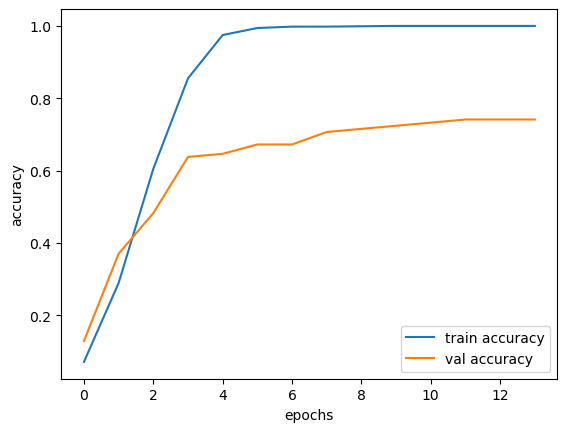

In [28]:
epochs = list(range(14))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

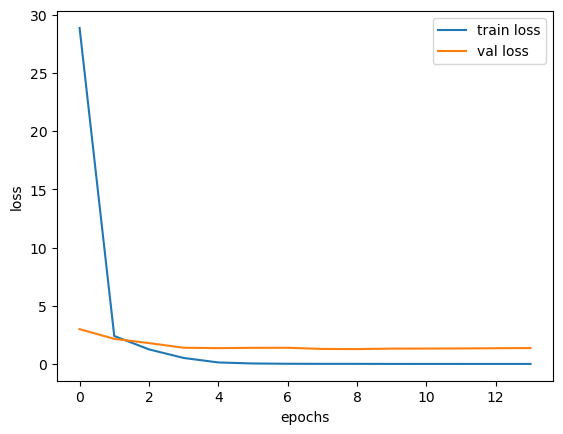

In [29]:
#loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [59]:
import numpy as np

# Assuming y_pred is one-hot encoded predictions
y_pred_classes = np.argmax(y_pred, axis=1)

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       1.00      0.85      0.92        13
           2       0.40      0.33      0.36         6
           3       0.85      0.92      0.88        12
           4       0.82      0.64      0.72        14
           5       0.91      0.83      0.87        12
           6       0.71      0.86      0.77        14
           7       1.00      1.00      1.00         9
           8       0.67      0.80      0.73        10
           9       0.80      0.50      0.62        16
          10       0.85      0.69      0.76        16
          11       0.82      0.90      0.86        10
          12       0.69      0.85      0.76        13
          13       0.77      0.83      0.80        12
          14       0.92      0.92      0.92        12
          15       0.85      0.73      0.79        15
          16       0.75      0.90      0.82        10
          17       0.73    

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_classes, normalize=True)

0.7604166666666666